In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as subplot
import matplotlib.pyplot as plt


In [2]:
title_basics = pd.read_csv('data/title.basics.tsv', delimiter='\t', encoding='utf-8')

/Users/huangzhisheng/miniconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
title_basics_movie = title_basics[title_basics['titleType'] == 'movie']
#print title_basics_movie.head(10)
#print "Number of movies", title_basics_movie.shape[0]


In [124]:
title_basics_movie_genres = title_basics_movie[title_basics_movie.genres != '\N']
uid = title_basics_movie_genres['tconst']
#print title_basics_movie_genres.head(10)
#print uid[0:19]
print "Number of movies with genre values:", title_basics_movie_genres.head(10)


Number of movies with genre values:         tconst titleType                     primaryTitle  \
8    tt0000009     movie                       Miss Jerry   
145  tt0000147     movie    The Corbett-Fitzsimmons Fight   
332  tt0000335     movie            Soldiers of the Cross   
571  tt0000574     movie      The Story of the Kelly Gang   
611  tt0000615     movie               Robbery Under Arms   
626  tt0000630     movie                           Hamlet   
669  tt0000675     movie                      Don Quijote   
670  tt0000676     movie  Don Álvaro o la fuerza del sino   
673  tt0000679     movie   The Fairylogue and Radio-Plays   
730  tt0000739     movie        El pastorcito de Torrente   

                       originalTitle  isAdult startYear endYear  \
8                         Miss Jerry        0      1894      \N   
145    The Corbett-Fitzsimmons Fight        0      1897      \N   
332            Soldiers of the Cross        0      1900      \N   
571      The Story of th

In [5]:
# copy from types_and_ratins.ipynb
def split_rows(data,column_name):
    '''
    input:
    data:an object of pandas.DataFrame whose rows need to be divided. type: pandas.DataFrame
    name_of_the_column: name of the column which we divide the rows by. type:string
    
    output:an object of pandas.DataFrame whose rows has been divided
    output type:pandas.DataFrame
    '''
    assert isinstance(column_name,str)
    
    tem=data[column_name].str.split(',',expand=True).stack().reset_index() #split the column and reindex
    tem.columns=['level_0','level_1','new_'+column_name]#name the new column
    res=pd.merge(tem,data,how='inner',left_on='level_0',right_index=True)#combine the column we just got with the raw dataset
    
    res=res.drop('level_0',1)#remove useless column
    res=res.drop('level_1',1)#remove useless column
    res=res.drop(column_name,1)#remove useless column
    
    return res

In [6]:
# genres contains all the genres in the dataset

movie_genres = split_rows(title_basics_movie_genres[['genres']], 'genres')
#print movie_genres


In [90]:
movies_per_genre = movie_genres.groupby(['new_genres'])['new_genres'].count()
movies_per_genre.name = 'Movies per genre'
movies_per_genre = movies_per_genre.sort_values()
print movies_per_genre
genre_others = movies_per_genre[movies_per_genre<10000]
print 'others', genre_others
type(genre_others)
#genre_others.sum()

new_genres
Short               3
Game-Show          13
Talk-Show          53
Reality-TV        131
Film-Noir         850
News             1765
Sport            4412
Animation        5932
Western          7061
Adult            7524
War              7547
Music            8504
Musical          8524
Sci-Fi           9497
Fantasy         10298
History         10717
Mystery         11638
Biography       13321
Family          13674
Adventure       20974
Horror          23582
Crime           26712
Thriller        29682
Romance         34964
Action          38519
Comedy          82746
Documentary     86649
Drama          161680
Name: Movies per genre, dtype: int64
others new_genres
Short            3
Game-Show       13
Talk-Show       53
Reality-TV     131
Film-Noir      850
News          1765
Sport         4412
Animation     5932
Western       7061
Adult         7524
War           7547
Music         8504
Musical       8524
Sci-Fi        9497
Name: Movies per genre, dtype: int64


pandas.core.series.Series

In [91]:
other_genres2 = []
for idx, val in enumerate(movies_per_genre.values):
    if val < 10000:
        other_genres2.append(idx)
print other_genres2       

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


In [92]:
movies_per_genre_wo_others = movies_per_genre.drop(genre_others.index).append(pd.Series([genre_others.sum()], index = ['Others']))

#movies_per_genre_wo_others =
print movies_per_genre_wo_others

Fantasy         10298
History         10717
Mystery         11638
Biography       13321
Family          13674
Adventure       20974
Horror          23582
Crime           26712
Thriller        29682
Romance         34964
Action          38519
Comedy          82746
Documentary     86649
Drama          161680
Others          61816
dtype: int64


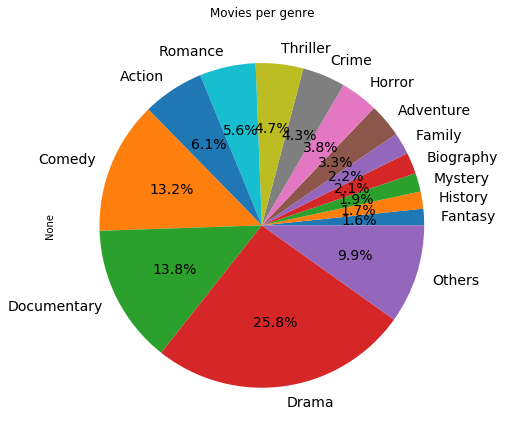

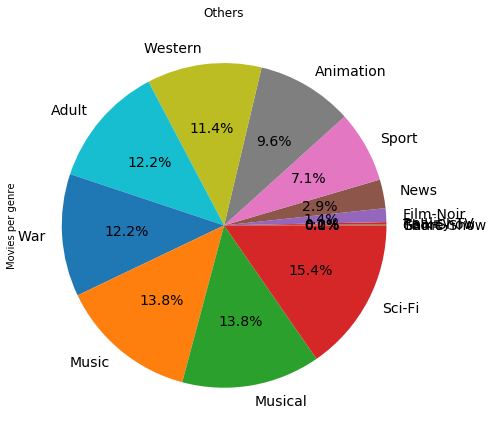

In [93]:
#movies_above_average = pd.DataFrame({'genres':movies_above_average.index, 'number':movies_above_average.values})
plt.figure(figsize=(16,8))
# plot chart
ax1 = plt.subplot(121, aspect='equal')
movies_per_genre_wo_others.plot(kind='pie', title = 'Movies per genre', ax=ax1, autopct='%1.1f%%', 
 startangle=0, shadow=False, legend = False, fontsize=14)
# print distribution in 'others'
plt.figure(figsize=(16,8))
ax2 = plt.subplot(121, aspect='equal')
genre_others.plot(kind='pie', title = 'Others', ax=ax2, autopct='%1.1f%%', 
 startangle=0, shadow=False, legend = False, fontsize=14)

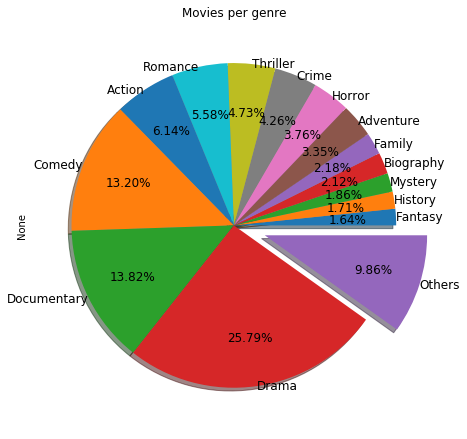

In [116]:
#[1, 3, 11, 12, 15, 16, 18, 19, 21, 22, 23, 24, 26, 27]
explodeTuple = (0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.2)
pieLabels = movies_per_genre_wo_others.index
plt.figure(figsize=(16,8))
axes = plt.subplot(121,aspect='equal')
#axes.pie(movies_per_genre_wo_others.values, explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=45,
       #  shadow=True, fontsize=14)
movies_per_genre_wo_others.plot(kind = 'pie',explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=0,
         shadow=True, fontsize=12,labeldistance=1,pctdistance = 0.7, title = 'Movies per genre')

Adult                                   7524
Animation                               5932
Film-Noir                                850
Music                                   8504
Musical                                 8524
News                                    1765
Sci-Fi                                  9497
Sport                                   4412
War                                     7547
Western                                 7061
Short_Game-Show_Talk-Show_Reality-TV     200
dtype: int64
Index([u'Adult', u'Animation', u'Film-Noir', u'Game-Show', u'Music',
       u'Musical', u'News', u'Reality-TV', u'Sci-Fi', u'Short', u'Sport',
       u'Talk-Show', u'War', u'Western'],
      dtype='object', name=u'new_genres')


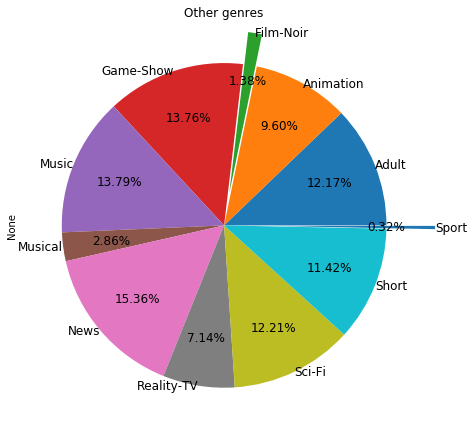

In [123]:
genre_others = genre_others.sort_index()

#print genre_others
grp = genre_others[genre_others<200]
genre_others_grp = genre_others.drop(grp.index).append(pd.Series([grp.sum()], index = ['Short_Game-Show_Talk-Show_Reality-TV']))
print genre_others_grp
explodeTuple = (0,0,0.2,0,0,0,0,0,0,0,0.3)
pieLabels = genre_others.index
print pieLabels
plt.figure(figsize=(16,8))
axes = plt.subplot(121,aspect='equal')
#axes.pie(movies_per_genre_wo_others.values, explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=45,
       #  shadow=True, fontsize=14)
genre_others_grp.plot(kind = 'pie',explode=explodeTuple,labels=pieLabels,autopct='%1.2f%%',startangle=0,
         shadow=False, fontsize=12,labeldistance=1,pctdistance = 0.7, title = 'Other genres')


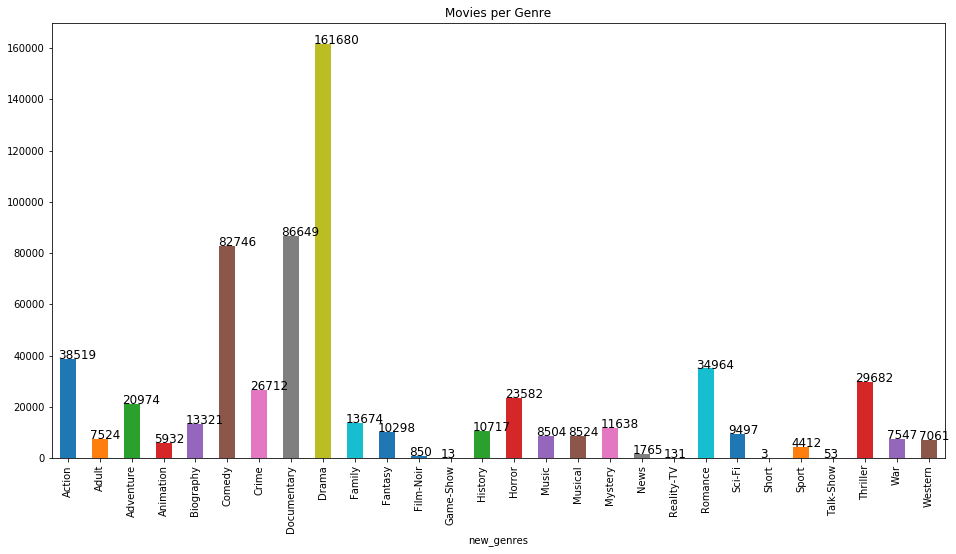

In [84]:
plt.figure(figsize=(16,8))
label = []
for i in movies_per_genre:
    label.append(i)
for i in range(len(movies_per_genre)):
    plt.text(x = i-.3, y = movies_per_genre[i]+0.3, s = label[i], size = 12)   
movies_per_genre.plot(kind = 'bar', title='Movies per Genre')